In [1]:
from pygtfcode import Config, State
from pprint import pprint

# Instantiate config object and set some parameters

In [2]:
config = Config()

In [3]:
config.init = 'abg'

In [4]:
config.grid.rmax = 200
config.grid.ngrid = 200
config.io.tlog = 1000

In [5]:
config

Config(
  io=IOParams(base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests', chatter=True, drho_prof=0.1, logpath='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000/logfile.txt', model_dir='Model000', model_no=0, overwrite=True, tlog=1000),
  grid=GridParams(rmin=0.001, rmax=200.0, ngrid=200),
  init=ABGParams(Mvir=3000000000.0, cvir=20.0, z=0.0, alpha=4.0, beta=4.0, gamma=0.1),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=0.01, eps_dt=0.01, eps_du=0.01, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_du=10, max_iter_v2=10)
)

# Instantiate State

In [6]:
state = State(config)

Computing characteristic parameters for simulation...
Setting up radial grid...
Initializing profiles...
State initialized.
Directory already exists: /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000


In [7]:
state.run()

Initial profiles written to disk.
0  0.000000e+00  1.000000e-06  2.064064e+00  3.945160e-01  2.295821e-15
1000  1.552188e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
2000  3.105929e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
3000  4.659670e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
4000  6.213411e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
5000  7.767153e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
6000  9.320894e+01  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
7000  1.087464e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
8000  1.242838e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
9000  1.398212e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
10000  1.553586e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
11000  1.708960e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.283572e-15
12000  1.864334e+02  1.553741e-02  2.122444e+00  3.953718e-01  2.28

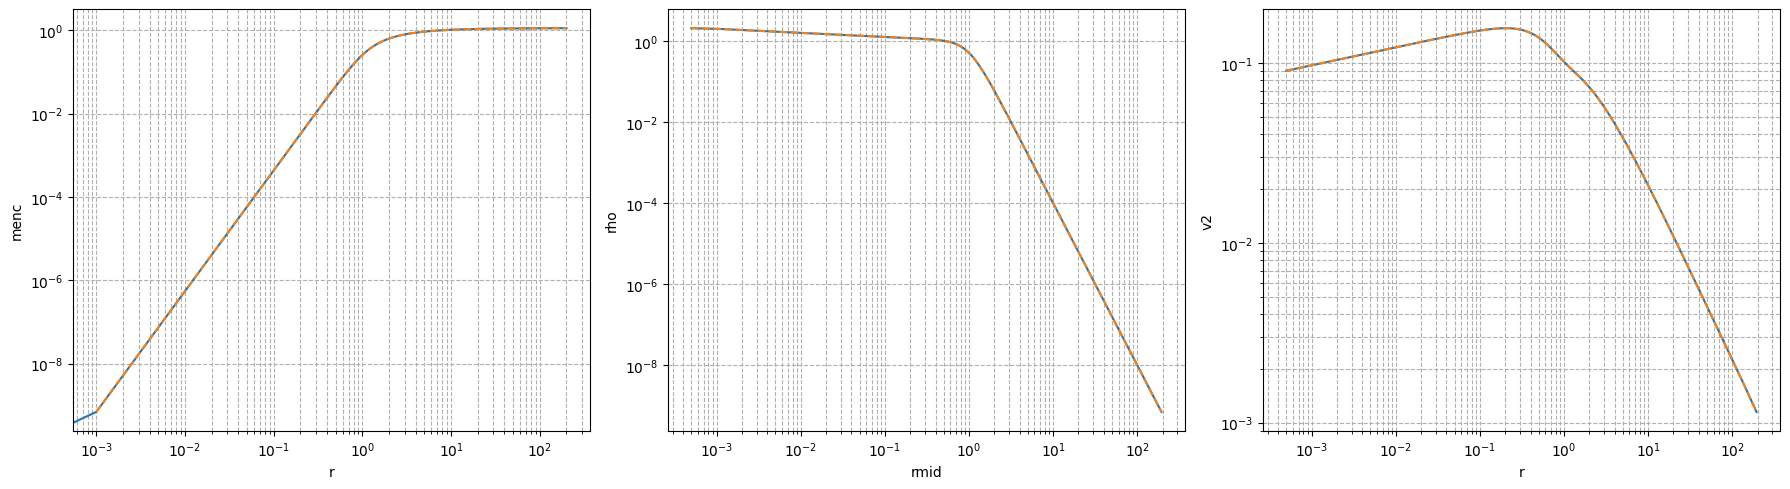

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Load and plot data from the Fortran output file
fortran_data = np.loadtxt('/Users/yaronetokayer/gtfcode/debug_abg.txt')

r_f = fortran_data[:, 0]
rmid_f = fortran_data[:, 1]
m_f = fortran_data[:, 2]
rho_f = fortran_data[:, 3]
v2_f = fortran_data[:, 4]

# Plot 1: Mass profile
axs[0].loglog(state.r, state.m)
axs[0].loglog(r_f, m_f, linestyle='--')
axs[0].set_xlabel('r')
axs[0].set_ylabel('menc')
axs[0].grid(True, which="both", ls="--")

# Plot 2: density profile
axs[1].loglog(state.rmid, state.rho)
axs[1].loglog(rmid_f, rho_f, linestyle='--')
axs[1].set_xlabel('rmid')
axs[1].set_ylabel('rho')
axs[1].grid(True, which="both", ls="--")

# Plot 2: Density profile
# axs[2].loglog(state.rmid, state.rho_interp(state.pot_interp(state.rmid)))
# axs[2].set_xlabel('rmid')
# axs[2].set_ylabel('rho_interp')
# axs[2].grid(True, which="both", ls="--")

# Plot 3: Velocity dispersion profile
axs[2].loglog(state.rmid, state.v2)
axs[2].loglog(rmid_f, v2_f, linestyle='--')
axs[2].set_xlabel('r')
axs[2].set_ylabel('v2')
axs[2].grid(True, which="both", ls="--")

# # Plot 3: Velocity dispersion profile
# axs[1].loglog(state.rho_interp.x, state.rho_interp(state.rho_interp.x))
# axs[1].set_xlabel('potential')
# axs[1].set_ylabel('rho_interp')
# axs[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [9]:
state.config.sim

SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0)

In [10]:
state.config

Config(
  io=IOParams(base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests', chatter=True, drho_prof=0.1, logpath='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000/logfile.txt', model_dir='Model000', model_no=0, overwrite=True, tlog=100000),
  grid=GridParams(rmin=0.001, rmax=200.0, ngrid=200),
  init=ABGParams(Mvir=3000000000.0, cvir=20.0, z=0.0, alpha=4.0, beta=4.0, gamma=0.1),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=0.01, eps_dt=0.01, eps_du=0.01, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_du=10, max_iter_v2=10)
)